In [2]:
library("dplyr")
library("ggplot2")


Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union




In [3]:
df <- read.csv("coin data/analyses/data-agg.csv",header=T)
df_long <- read.csv("coin data/analyses/data-long.csv",header=T)
df_time_agg <- read.csv("coin data/analyses/df-time-agg.csv",header=T)
df_time <- read.csv("coin data/analyses/df-time.csv",header=T)

# Data exploration

In [4]:
n <- nrow(df)
df1 <- df[,-c(2,4)] # heads to heads
df2 <- df[,-c(1,3)] # tails to heads
df2[,1] <- df2[,2]-df2[,1] # tails to tails
names(df1) <- names(df2) <- c("y","m","person","coin")
# df1 --> lancés qui ont commencé par un heads + nombre de lancés qui ont terminé par un heads
# df2 --> lancés qui ont commencé par un tails + nombre de lancés qui ont terminé par un tails

start <- rep(c("heads","tails"),c(n,n))
df <- rbind(df1,df2)
df$person <- factor(df$person); 
df$coin <- factor(df$coin); 
df$start <- factor(start)
summary(glm(cbind(y,m-y)~1,family=binomial,data=df))

# m = nombre de lancés commencant par 'start'
# y = nombre de lancés terminant par 'start'



Call:
glm(formula = cbind(y, m - y) ~ 1, family = binomial, data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.030799   0.003377   9.119   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 686.86  on 421  degrees of freedom
Residual deviance: 686.86  on 421  degrees of freedom
AIC: 3596

Number of Fisher Scoring iterations: 3


In [5]:
dim(df)

[1] 422   5

In [6]:
per_coin <- df %>%
  group_by(coin,start) %>%
  summarize(y=sum(y),
            m=sum(m)) %>%
  mutate(percentage=y*100/m)

per_coin_heads <- per_coin %>%
  filter(start == "heads")

per_coin_tails <- per_coin %>%
  filter(start == "tails")
  
per_person <- df %>%
  group_by(person,start) %>%
  summarize(y=sum(y),
            m=sum(m))%>%
  mutate(percentage=y*100/m)  

  per_person_heads <- per_person %>%
  filter(start == "heads")

per_person_tails <- per_person %>%
  filter(start == "tails")
  

`summarise()` has grouped output by 'coin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'person'. You can override using the
`.groups` argument.


## Number of heads when the coin started heads per coin

Warning message in geom_text(aes(x = 10, y = mean(per_coin_heads$percentage) + 1, :
"All aesthetics have length 1, but the data has 44 rows.
i Did you mean to use `annotate()`?"


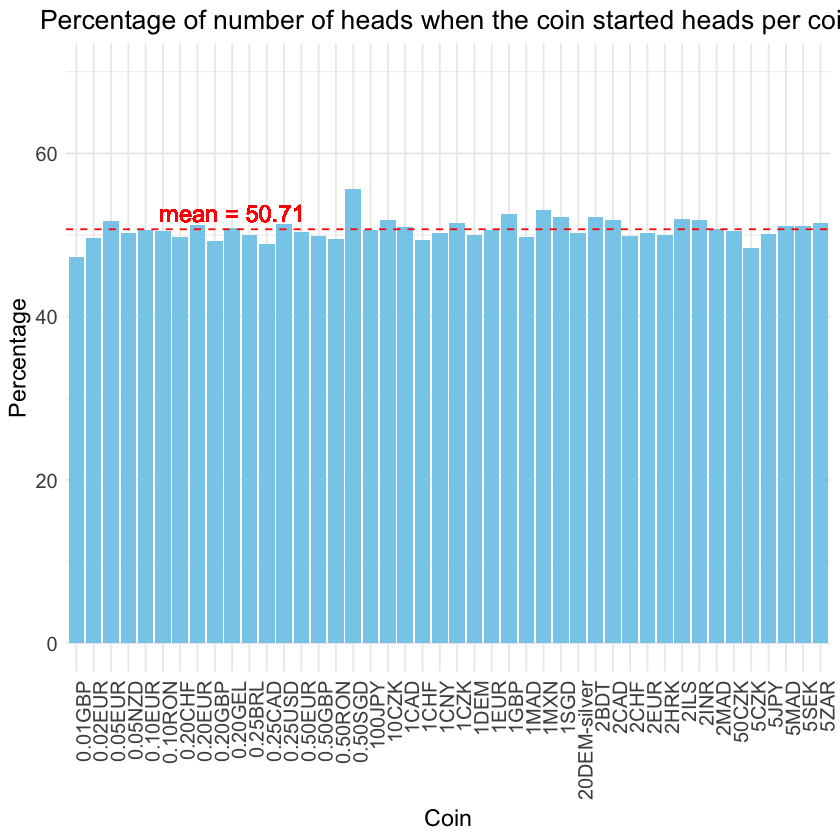

In [7]:
ggplot(per_coin_heads, aes(x = coin, y = percentage)) +
  geom_bar(stat = "identity", fill ="skyblue") +
  geom_hline(yintercept = mean(per_coin_heads$percentage), linetype = "dashed", color = "red") +  # Ligne horizontale à la moyenne # nolint
  geom_text(aes(x = 10, y = mean(per_coin_heads$percentage) + 1, label = paste("mean =", round(mean(per_coin_heads$percentage), 2))),  # nolint
            color = "red", size = 5, vjust = 0) + 
  labs(title = "Percentage of number of heads when the coin started heads per coin", x = "Coin", y = "Percentage") + # nolint
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1, , size = 12),
  axis.text.y = element_text(size = 12), 
  axis.title.x = element_text(size = 14),
  axis.title.y = element_text(size = 14),
  plot.title = element_text(size = 16, hjust = 0.5)) +
  scale_y_continuous(limits = c(0, 70))


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message in geom_text(aes(x = mean(x) + 1, y = 6, label = paste("Mean =", :
"All aesthetics have length 1, but the data has 44 rows.
i Did you mean to use `annotate()`?"


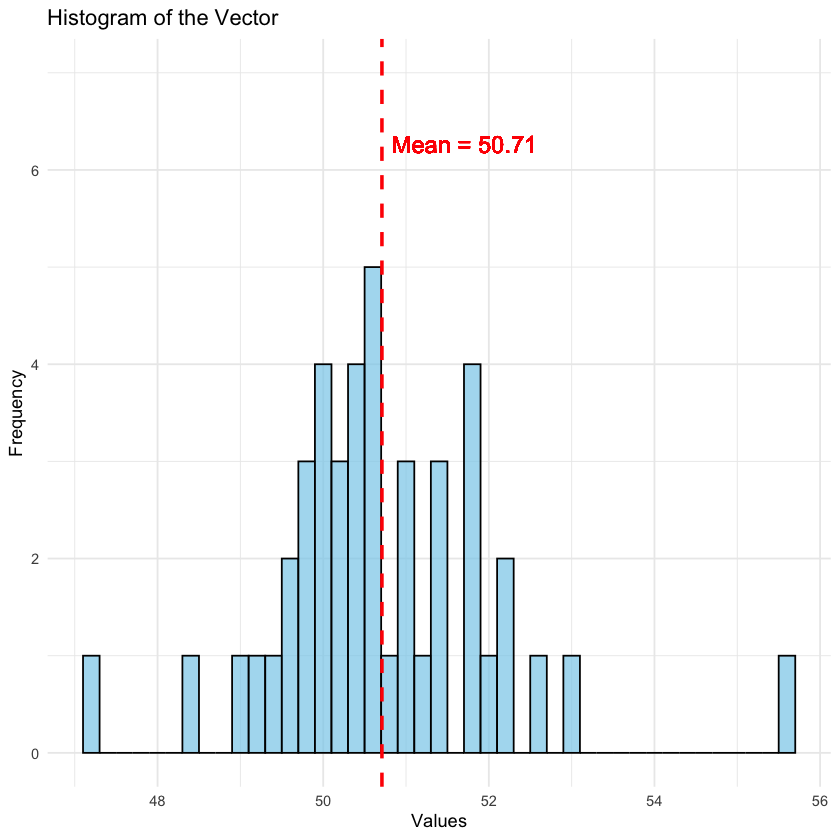

In [8]:
ggplot(data.frame(x = per_coin_heads$percentage), aes(x = x)) +
  geom_histogram(binwidth = 0.2, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(x)), linetype = "dashed", color = "red", size = 1) + 
  geom_text(aes(x = mean(x)+1, y = 6, label = paste("Mean =", round(mean(x), 2))), 
            color = "red", size = 5, vjust = -1) +
  labs(title = "Histogram of the Vector", x = "Values", y = "Frequency") +
  theme_minimal() +
  scale_y_continuous(limits = c(0, 7))

In [9]:
summary(per_coin_heads$percentage)
cat("Standard deviation: ")
print(sd(per_coin_heads$percentage))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.28   49.95   50.57   50.71   51.45   55.65 

Standard deviation: [1] 1.357797


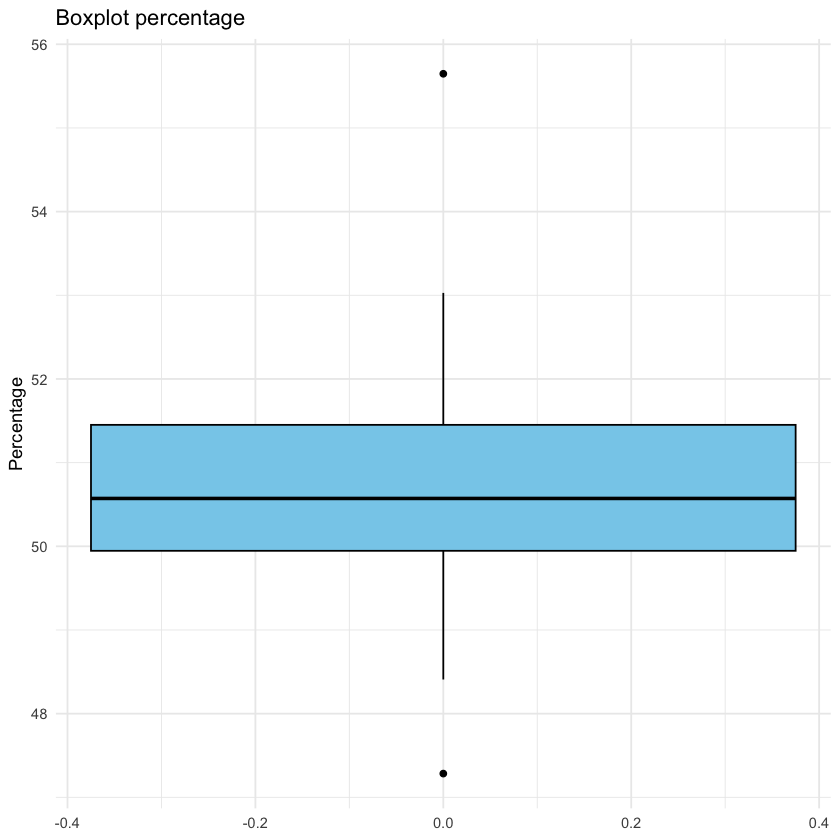

In [10]:
ggplot(per_coin_heads, aes(y = percentage)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Boxplot percentage", y = "Percentage") +
  theme_minimal()

We can on the previous plot that there are two ouliers: the fifty cent coin of SGD (Singapour) and 1 cent coin GBP

## Number of tails when the coin started tails per coin


Warning message in geom_text(aes(x = 10, y = mean(per_coin_tails$percentage) + 2, :
"All aesthetics have length 1, but the data has 44 rows.
i Did you mean to use `annotate()`?"


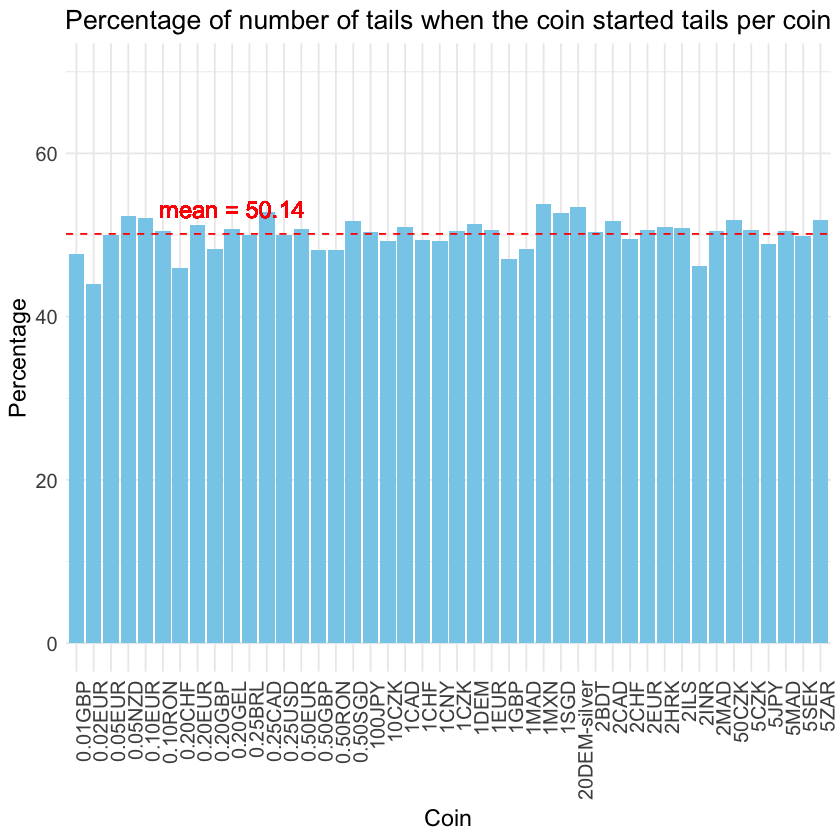

In [11]:
ggplot(per_coin_tails, aes(x = coin, y = percentage)) +
  geom_bar(stat = "identity", fill ="skyblue") +
  geom_hline(yintercept = mean(per_coin_tails$percentage), linetype = "dashed", color = "red") + 
  geom_text(aes(x = 10, y = mean(per_coin_tails$percentage) + 2, label = paste("mean =", round(mean(per_coin_tails$percentage), 2))), 
            color = "red", size = 5, vjust = 0) + 
  labs(title = "Percentage of number of tails when the coin started tails per coin", x = "Coin", y = "Percentage") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1, , size = 12),
  axis.text.y = element_text(size = 12), 
  axis.title.x = element_text(size = 14),
  axis.title.y = element_text(size = 14),
  plot.title = element_text(size = 16, hjust = 0.5)) +
  scale_y_continuous(limits = c(0, 70))


Warning message in geom_text(aes(x = mean(x) - 1.3, y = 6, label = paste("Mean =", :
"All aesthetics have length 1, but the data has 44 rows.
i Did you mean to use `annotate()`?"


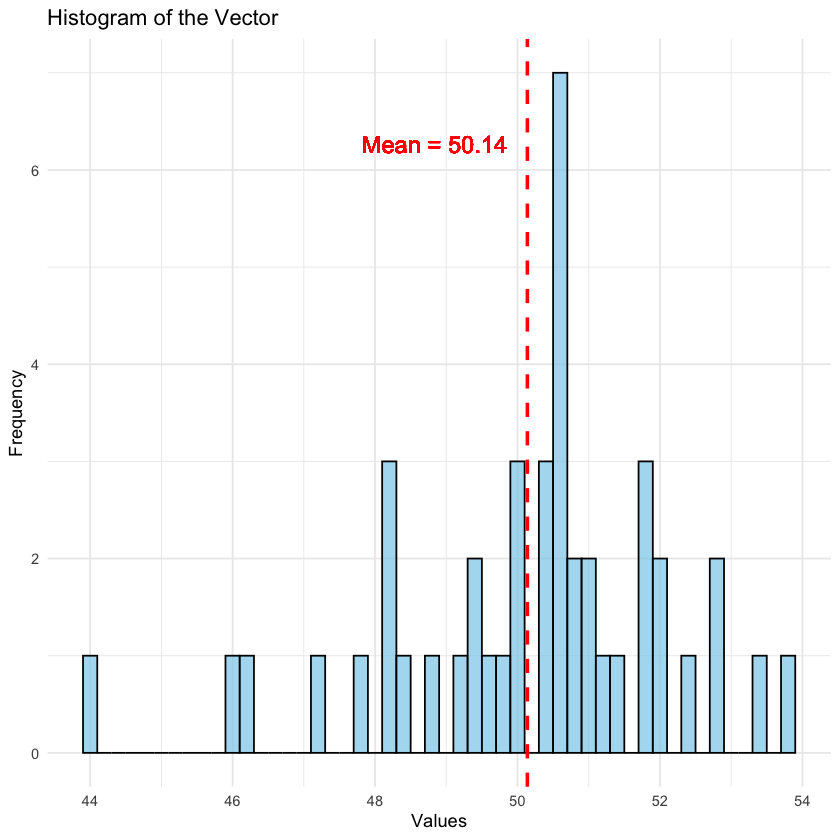

In [12]:
ggplot(data.frame(x = per_coin_tails$percentage), aes(x = x)) +
  geom_histogram(binwidth = 0.2, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(x)), linetype = "dashed", color = "red", size = 1) + 
  labs(title = "Histogram of the Vector", x = "Values", y = "Frequency") +
  geom_text(aes(x = mean(x)-1.3, y = 6, label = paste("Mean =", round(mean(x), 2))), 
            color = "red", size = 5, vjust = -1) +
  labs(title = "Histogram of the Vector", x = "Values", y = "Frequency") +
  theme_minimal() +
  scale_y_continuous(limits = c(0, 7))



In [13]:
summary(per_coin_tails$percentage)
cat("Standard deviation: ")
print(sd(per_coin_tails$percentage))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  44.06   49.30   50.50   50.14   51.28   53.84 

Standard deviation: [1] 1.984118


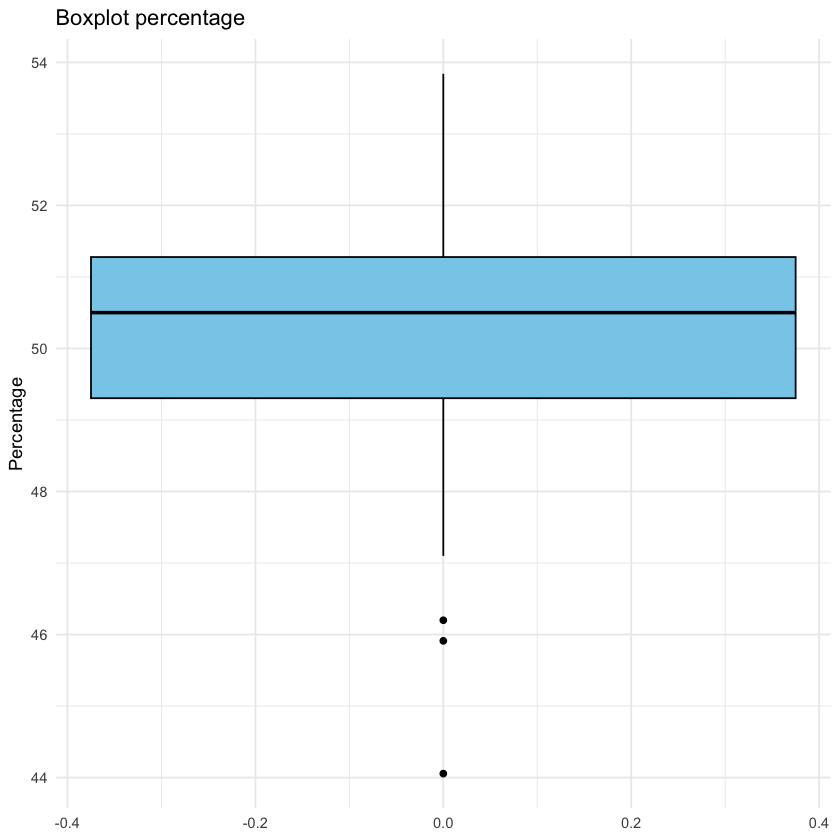

In [14]:
ggplot(per_coin_tails, aes(y = percentage)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Boxplot percentage", y = "Percentage") +
  theme_minimal()

3 outliers: 2 cent EUR, 2 INR (rupee), 0.2 CHF 

## Number of heads when the coin started heads per participant

We also want to check if the outcomes can be influenced by individual, if they have a certain way of tossing the coin

Warning message in geom_text(aes(x = 10, y = mean(per_person_heads$percentage) + :
"All aesthetics have length 1, but the data has 48 rows.
i Did you mean to use `annotate()`?"


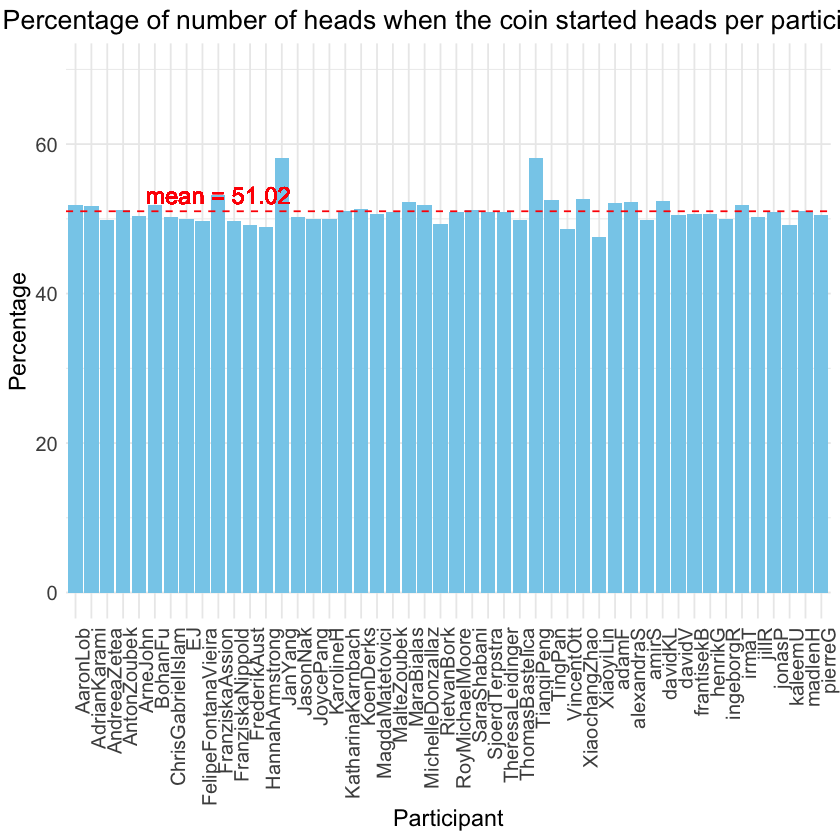

In [15]:
ggplot(per_person_heads, aes(x = person, y = percentage)) +
  geom_bar(stat = "identity", fill ="skyblue") +
  geom_hline(yintercept = mean(per_person_heads$percentage), linetype = "dashed", color = "red") + 
  geom_text(aes(x = 10, y = mean(per_person_heads$percentage) + 1, label = paste("mean =", round(mean(per_person_heads$percentage), 2))), 
            color = "red", size = 5, vjust = 0) + 
  labs(title = "Percentage of number of heads when the coin started heads per participant", x = "Participant", y = "Percentage") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1, , size = 12),
  axis.text.y = element_text(size = 12), 
  axis.title.x = element_text(size = 14),
  axis.title.y = element_text(size = 14),
  plot.title = element_text(size = 16, hjust = 0.5)) +
  scale_y_continuous(limits = c(0, 70))

Warning message in geom_text(aes(x = mean(x) + 1, y = 6, label = paste("Mean =", :
"All aesthetics have length 1, but the data has 48 rows.
i Did you mean to use `annotate()`?"


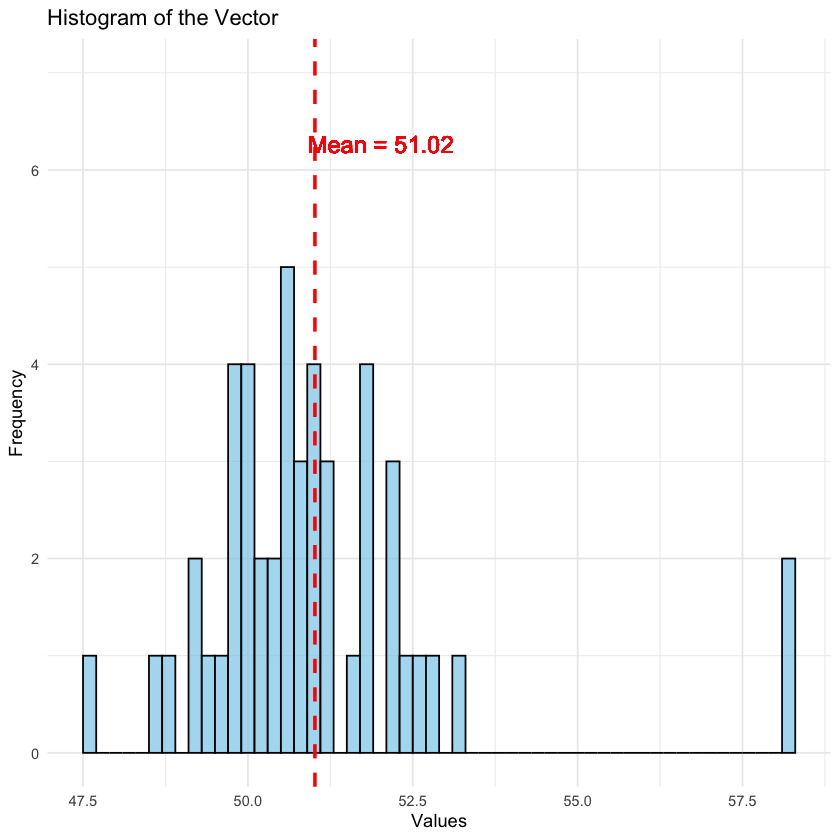

In [16]:
ggplot(data.frame(x = per_person_heads$percentage), aes(x = x)) +
  geom_histogram(binwidth = 0.2, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(x)), linetype = "dashed", color = "red", size = 1) + 
  geom_text(aes(x = mean(x)+1, y = 6, label = paste("Mean =", round(mean(x), 2))), 
            color = "red", size = 5, vjust = -1) +
  labs(title = "Histogram of the Vector", x = "Values", y = "Frequency") +
  theme_minimal() +
  scale_y_continuous(limits = c(0, 7))

In [17]:
summary(per_person_heads$percentage)
cat("Standard deviation: ")
print(sd(per_person_heads$percentage))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.53   49.99   50.75   51.02   51.80   58.17 

Standard deviation: [1] 1.894232


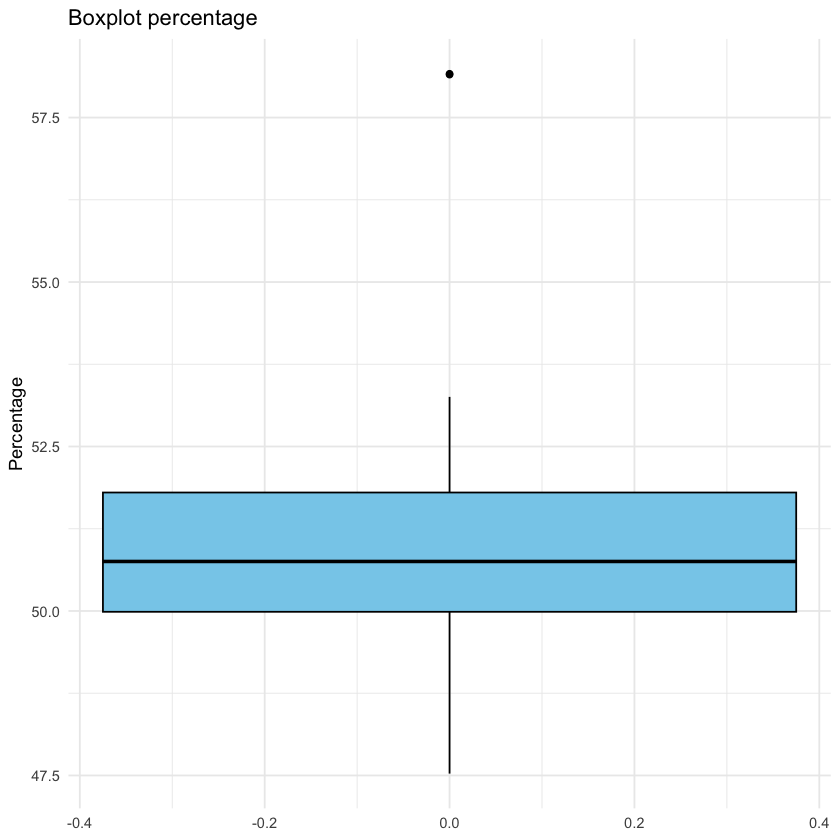

In [18]:
ggplot(per_person_heads, aes(y = percentage)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Boxplot percentage", y = "Percentage") +
  theme_minimal()

## Number of tails when the coin started tails per participant

Warning message in geom_text(aes(x = 10, y = mean(per_person_tails$percentage) + :
"All aesthetics have length 1, but the data has 48 rows.
i Did you mean to use `annotate()`?"


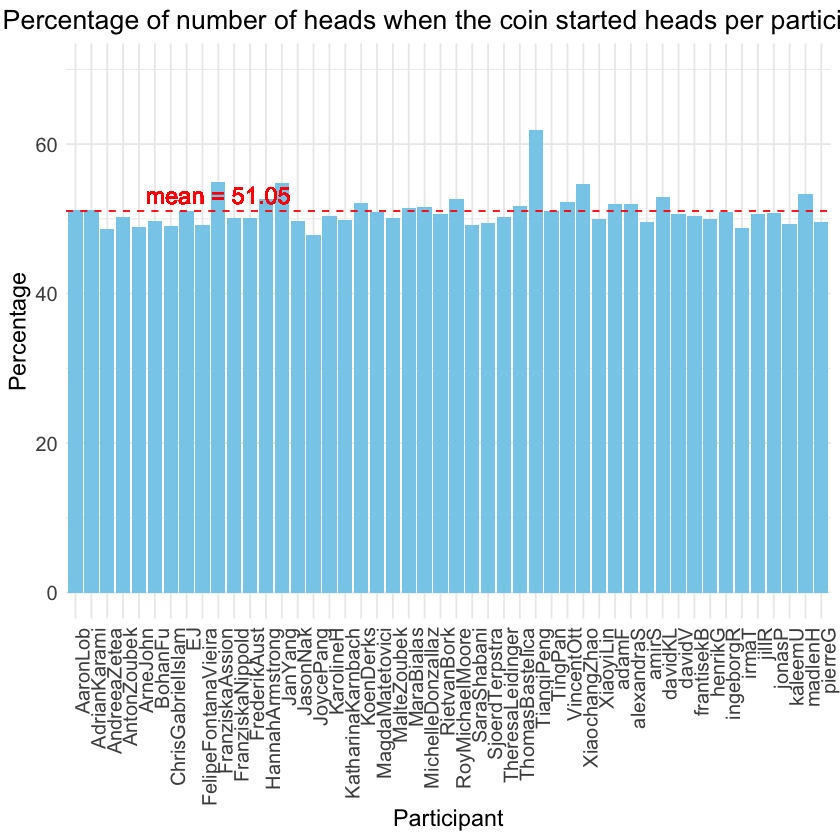

In [19]:
ggplot(per_person_tails, aes(x = person, y = percentage)) +
  geom_bar(stat = "identity", fill ="skyblue") +
  geom_hline(yintercept = mean(per_person_tails$percentage), linetype = "dashed", color = "red") + 
  geom_text(aes(x = 10, y = mean(per_person_tails$percentage) + 1, label = paste("mean =", round(mean(per_person_tails$percentage), 2))), 
            color = "red", size = 5, vjust = 0) + 
  labs(title = "Percentage of number of heads when the coin started heads per participant", x = "Participant", y = "Percentage") +
  theme_minimal() + 
  theme(axis.text.x = element_text(angle = 90, hjust = 1, , size = 12),
  axis.text.y = element_text(size = 12), 
  axis.title.x = element_text(size = 14),
  axis.title.y = element_text(size = 14),
  plot.title = element_text(size = 16, hjust = 0.5)) +
  scale_y_continuous(limits = c(0, 70))

Warning message in geom_text(aes(x = mean(x) + 1, y = 6, label = paste("Mean =", :
"All aesthetics have length 1, but the data has 48 rows.
i Did you mean to use `annotate()`?"


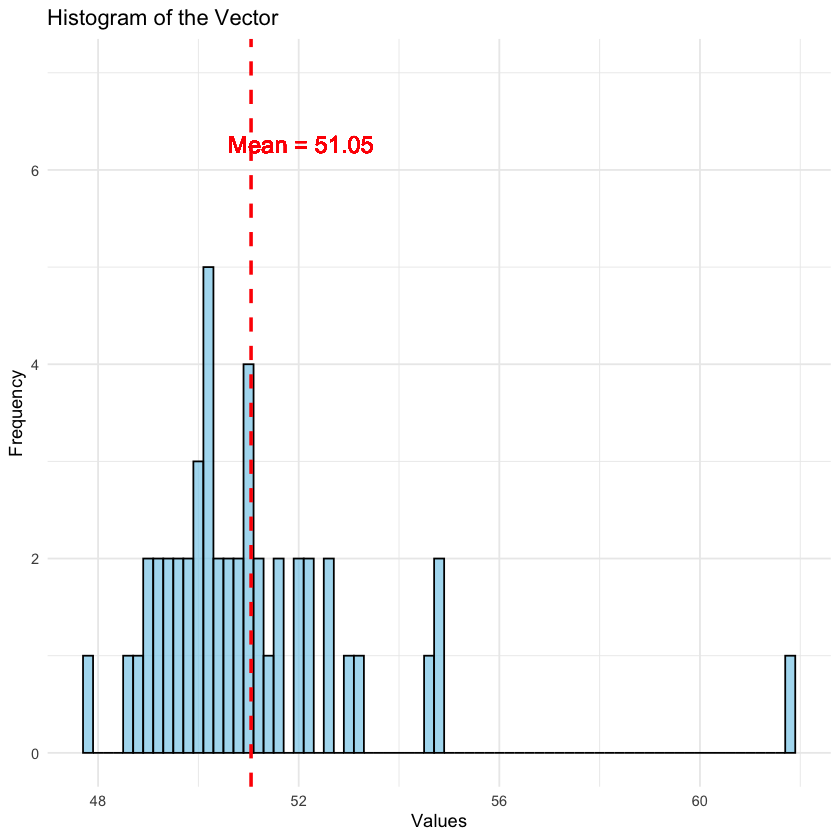

In [20]:
ggplot(data.frame(x = per_person_tails$percentage), aes(x = x)) +
  geom_histogram(binwidth = 0.2, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_vline(aes(xintercept = mean(x)), linetype = "dashed", color = "red", size = 1) + 
  geom_text(aes(x = mean(x)+1, y = 6, label = paste("Mean =", round(mean(x), 2))), 
            color = "red", size = 5, vjust = -1) +
  labs(title = "Histogram of the Vector", x = "Values", y = "Frequency") +
  theme_minimal() +
  scale_y_continuous(limits = c(0, 7))

In [21]:
summary(per_person_tails$percentage)
cat("Standard deviation: ")
print(sd(per_person_tails$percentage))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  47.86   49.75   50.63   51.05   51.75   61.82 

Standard deviation: [1] 2.234184


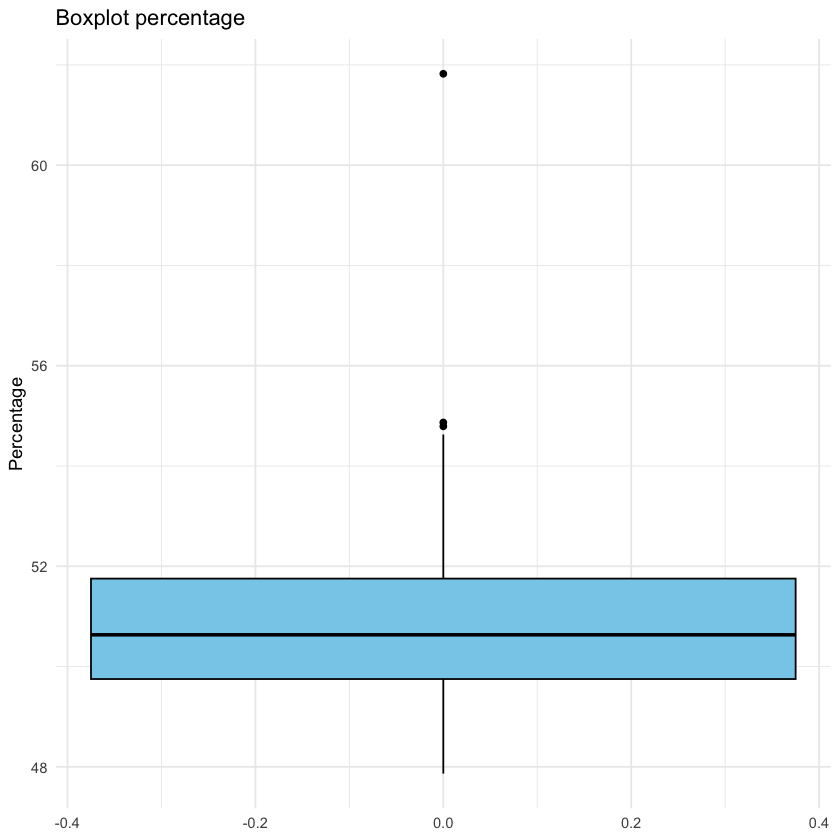

In [22]:
ggplot(per_person_tails, aes(y = percentage)) +
  geom_boxplot(fill = "skyblue", color = "black") +
  labs(title = "Boxplot percentage", y = "Percentage") +
  theme_minimal()

In [23]:
table(df_long$dataset)
table(df_time$person_dataset_sequence)


       Bc Thesis         Internet         Marathon     Marathon-MSc 
           75036            31272            59197            90643 
Marathon-Manheim     Marathon-PhD           top-up 
           41009            50900             2700 


               AaronLob-Marathon-MSc-1               AaronLob-Marathon-MSc-10 
                                   100                                    100 
              AaronLob-Marathon-MSc-11               AaronLob-Marathon-MSc-12 
                                   100                                    100 
              AaronLob-Marathon-MSc-13               AaronLob-Marathon-MSc-14 
                                   100                                    100 
              AaronLob-Marathon-MSc-15               AaronLob-Marathon-MSc-16 
                                   100                                    100 
              AaronLob-Marathon-MSc-17               AaronLob-Marathon-MSc-18 
                                   100                                    100 
              AaronLob-Marathon-MSc-19                AaronLob-Marathon-MSc-2 
                                   100                                    100 
              AaronLob-Marathon-MSc-20             

Remarque: 
- Standard deviation larger for participants than coins

# Modelling 

In [24]:
# y = nombre de lancés terminant par 'start'
# m-y= nombre de lancés ne terminant pas par 'start'

### Model with all data

In [34]:
model <- glm(cbind(y,m-y)~start,family=binomial,data=df)
print(summary(model))
coef(summary(model))[, "Pr(>|z|)"][2]


Call:
glm(formula = cbind(y, m - y) ~ start, family = binomial, data = df)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.031366   0.004783   6.558 5.44e-11 ***
starttails  -0.001132   0.006755  -0.168    0.867    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 686.86  on 421  degrees of freedom
Residual deviance: 686.83  on 420  degrees of freedom
AIC: 3598

Number of Fisher Scoring iterations: 3



starttails 
 0.8668641

In [26]:
beta_0 <- model$coefficients[1]
beta_1 <- model$coefficients[2]

In [27]:
p_heads = exp(beta_0)/(1+ exp(beta_0))
p_tails = exp(beta_0+beta_1)/(1+ exp(beta_0+beta_1))
print(p_heads)
print(p_tails)

(Intercept) 
   0.507841 
(Intercept) 
  0.5075579 


Beta_1 no significant 


## Participant has an influence ? 

In [35]:
results_person_df <- data.frame(Participant = character(0), 
                         Beta0 = numeric(0), 
                         Beta1 = numeric(0),
                         p_value = numeric(0), 
                         stringsAsFactors = FALSE)

participants <- unique(df$person)

for (p in participants) {
    df_p <- subset(df, person == p)
  
  model <- glm(cbind(y, m - y) ~ start, family = binomial, data = df_p)
  
  beta0 <- model$coefficients[1]
  beta1 <- model$coefficients[2]
  p_value <- coef(summary(model))[, "Pr(>|z|)"][2]

  results_person_df <- rbind(results_person_df, data.frame(Participant = p, Beta0 = beta0, Beta1 = beta1, p_value=p_value))
}

print(results_person_df)


                      Participant         Beta0        Beta1     p_value
(Intercept)            frantisekB  2.462885e-02 -0.010271676 0.715823547
(Intercept)1            ingeborgR  9.385266e-04  0.036906322 0.392366890
(Intercept)2           alexandraS  8.757024e-02 -0.008484925 0.779600994
(Intercept)3              madlenH  4.332182e-02  0.087262327 0.066463563
(Intercept)4              henrikG  2.612563e-02 -0.025422316 0.404825285
(Intercept)5                adamF  8.584227e-02 -0.007342301 0.867079897
(Intercept)6                jillR  1.118024e-02  0.014106336 0.776796179
(Intercept)7               jonasP  3.517549e-02 -0.004724418 0.906011579
(Intercept)8              pierreG  2.006933e-02 -0.037306492 0.253384244
(Intercept)9                amirS -6.104863e-03 -0.013422306 0.680982350
(Intercept)10              davidV  2.047853e-02  0.004877415 0.881526381
(Intercept)11             kaleemU -3.365433e-02  0.008068948 0.809245353
(Intercept)12               irmaT  7.165599e-02 -0.

In [88]:
results_person_df <- results_person_df %>%
    mutate(prob_heads= exp(Beta0)/(1+ exp(Beta0)),
    prob_tails = exp(Beta0+Beta1)/(1+ exp(Beta0+Beta1)) )

print(mean(results_person_df$prob_heads))
print(mean(results_person_df$prob_tails))

[1] 0.5101639
[1] 0.5105019


## Coin has an influence ? 

In [91]:
results_coin_df <- data.frame(Participant = character(0), 
                         Beta0 = numeric(0), 
                         Beta1 = numeric(0),
                         stringsAsFactors = FALSE)

coin <- unique(df$coin)

for (p in coin) {
    df_p <- subset(df, coin == p)
  
  model <- glm(cbind(y, m - y) ~ start, family = binomial, data = df_p)
  
  beta0 <- model$coefficients[1]
  beta1 <- model$coefficients[2]

  results_coin_df <- rbind(results_coin_df, data.frame(Participant = p, Beta0 = beta0, Beta1 = beta1))
}

print(results_coin_df)

               Participant         Beta0         Beta1
(Intercept)   20DEM-silver  0.0123712918  0.1237608825
(Intercept)1          1CZK  0.0594234205 -0.0392207132
(Intercept)2          5CZK -0.0636949951  0.0903632422
(Intercept)3       0.25USD  0.0542661867 -0.0552073632
(Intercept)4         10CZK  0.0757639511 -0.1062091070
(Intercept)5       0.50EUR  0.0128754140  0.0144969771
(Intercept)6          1EUR  0.0262355036 -0.0009768117
(Intercept)7          2HRK  0.0009385266  0.0369063219
(Intercept)8          1MXN  0.1212880424  0.0326445112
(Intercept)9          2EUR  0.0089871570  0.0178551643
(Intercept)10         5ZAR  0.0576291128  0.0184945826
(Intercept)11      0.05EUR  0.0684435718 -0.0679092411
(Intercept)12      0.20EUR  0.0469606899  0.0025359897
(Intercept)13      0.20GEL  0.0324256700 -0.0017224796
(Intercept)14         1CHF -0.0240760626  0.0019218557
(Intercept)15         1CNY  0.0105541877 -0.0375099977
(Intercept)16       100JPY  0.0239691901 -0.0106178569
(Intercept

In [92]:
results_coin_df <- results_coin_df %>%
    mutate(prob_heads= exp(Beta0)/(1+ exp(Beta0)),
    prob_tails = exp(Beta0+Beta1)/(1+ exp(Beta0+Beta1)) )

print(mean(results_coin_df$prob_heads))
print(mean(results_coin_df$prob_tails))

[1] 0.5070915
[1] 0.5013874
